In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
plt.style.use('seaborn')

In [41]:
data_import = pd.read_csv("/Users/james/dev/swayable/feasibilitydata.csv")
data = data_import.dropna()

In [42]:
data.head()

,source,pop,count/day,geo,test,days
0,peanutlabs,"6,931,071",234.0,AZ,ACLU AZ Senate Primary,3.4
1,peanutlabs,"2,907,289",382.0,KS,ACLU TEST #2: KANSAS,1.4
2,peanutlabs,"5,519,952",372.0,MN,Alliance for a Better Minnesota,3.7
3,peanutlabs,"5,519,952",714.0,MN,Alliance for a Better Minnesota Round 2,1.0
4,peanutlabs,"711,000",105.0,District,Be A Hero,3.2


In [59]:
def stringToInt(s):
    lst = s.split(',')
    res = ''.join(lst)
    return int(res)

int

In [105]:
df = data[['pop','count/day']]
df['NewPop'] = df['pop'].apply(lambda x:stringToInt(x))
df = df[['NewPop','count/day']].sort_values(by='NewPop')
df.head()

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,NewPop,count/day
16,711000,89.0
17,711000,39.0
11,711000,116.0
10,711000,93.0
25,711000,17.0


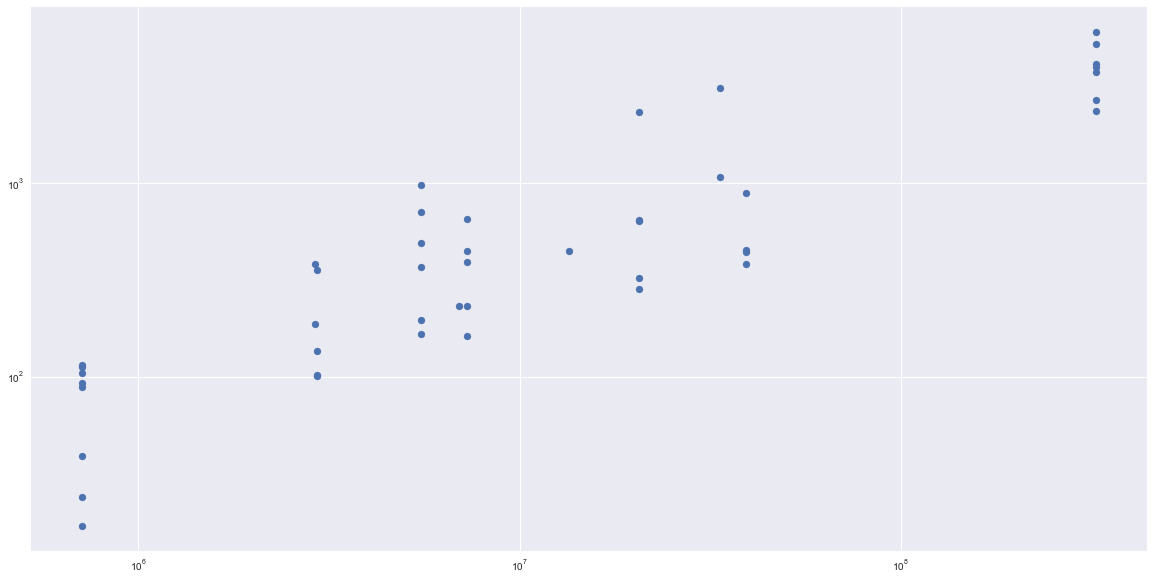

In [67]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.scatter(df['NewPop'],df['count/day'])
plt.yscale('log')
plt.xscale('log')
plt.show()

In [106]:
x = list(df['NewPop'])
y = list(df['count/day'])

fit = np.polyfit(x, y, 1)
fit_new = np.poly1d(fit)

In [107]:
print(fit)
print(np.poly1d(fit_new))

[  1.15026517e-05   3.32169835e+02]
 
1.15e-05 x + 332.2


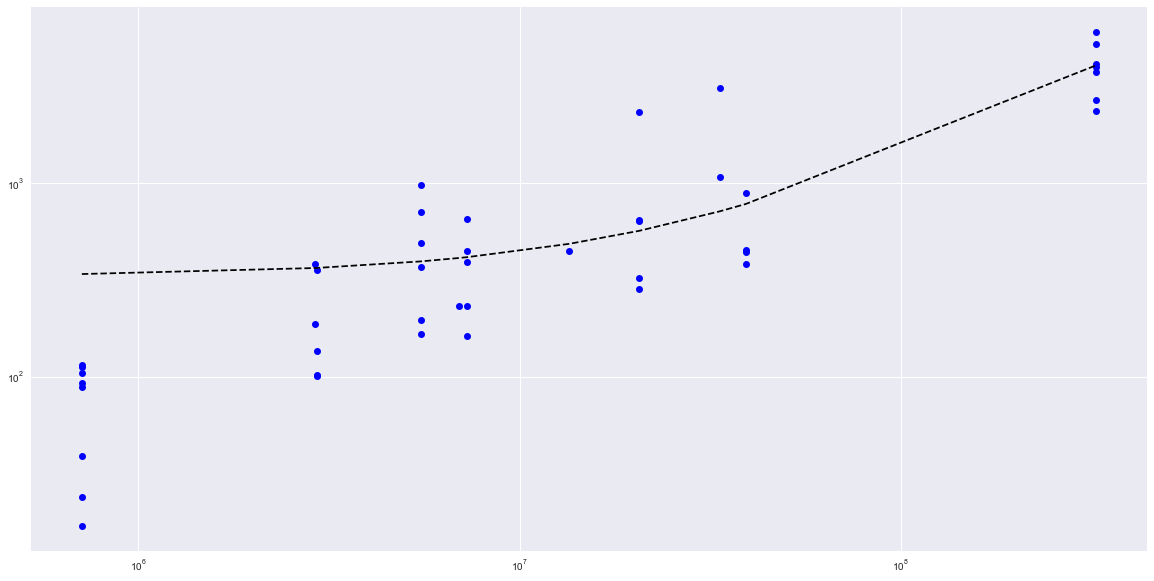

In [108]:
plt.figure(figsize=(20,10))
plt.plot(x, y, 'bo', x, fit_new(x), '--k')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [92]:
ndf = data[['source','pop','count/day']]
ndf['NewPop'] = ndf['pop'].apply(lambda x: stringToInt(x))
ndf.drop(['pop'], axis=1, inplace=True)
ndf = ndf.sort_values(by='NewPop')
ndf.head()

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,source,count/day,NewPop
16,prodege,89.0,711000
17,prodege,39.0,711000
11,peanutlabs,116.0,711000
10,peanutlabs,93.0,711000
25,prodege,17.0,711000


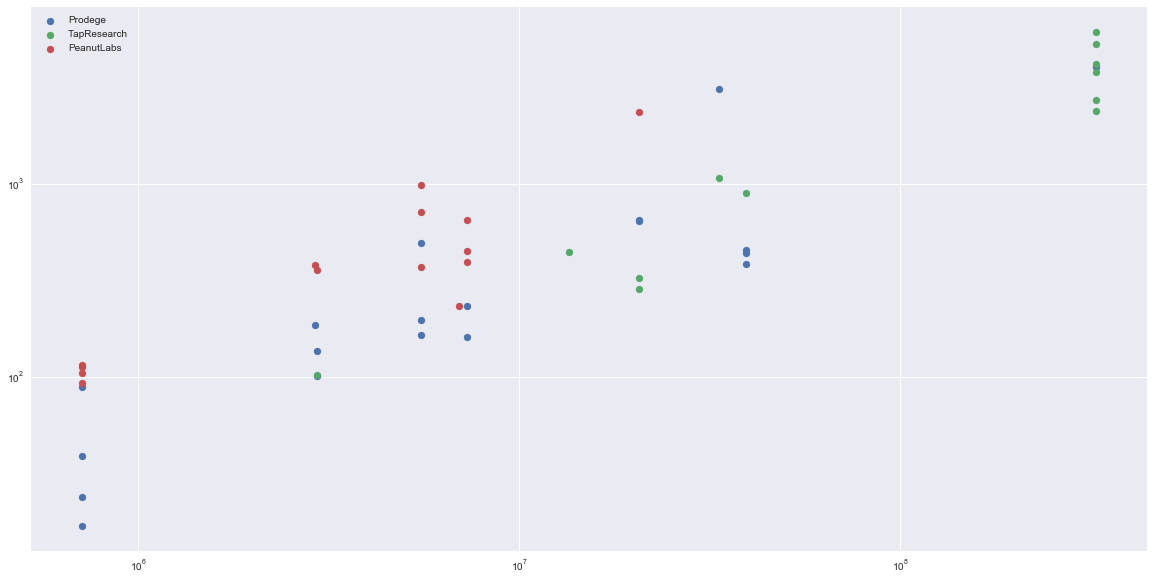

In [171]:
f = plt.figure(figsize=(20,10))
plt.scatter(ndf[ndf.source=='prodege']['NewPop'], ndf[ndf.source=='prodege']['count/day'],label='Prodege')
plt.scatter(ndf[ndf.source=='tapresearch']['NewPop'], ndf[ndf.source=='tapresearch']['count/day'],label='TapResearch')
plt.scatter(ndf[ndf.source=='peanutlabs']['NewPop'], ndf[ndf.source=='peanutlabs']['count/day'],label='PeanutLabs')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
f.savefig("export.pdf", bbox_inches='tight')

In [82]:
ndf[ndf.source=='prodege'].head()

,source,count/day,NewPop
16,prodege,89.0,711000
17,prodege,39.0,711000
25,prodege,17.0,711000
24,prodege,24.0,711000
14,prodege,187.0,2907289


/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in log



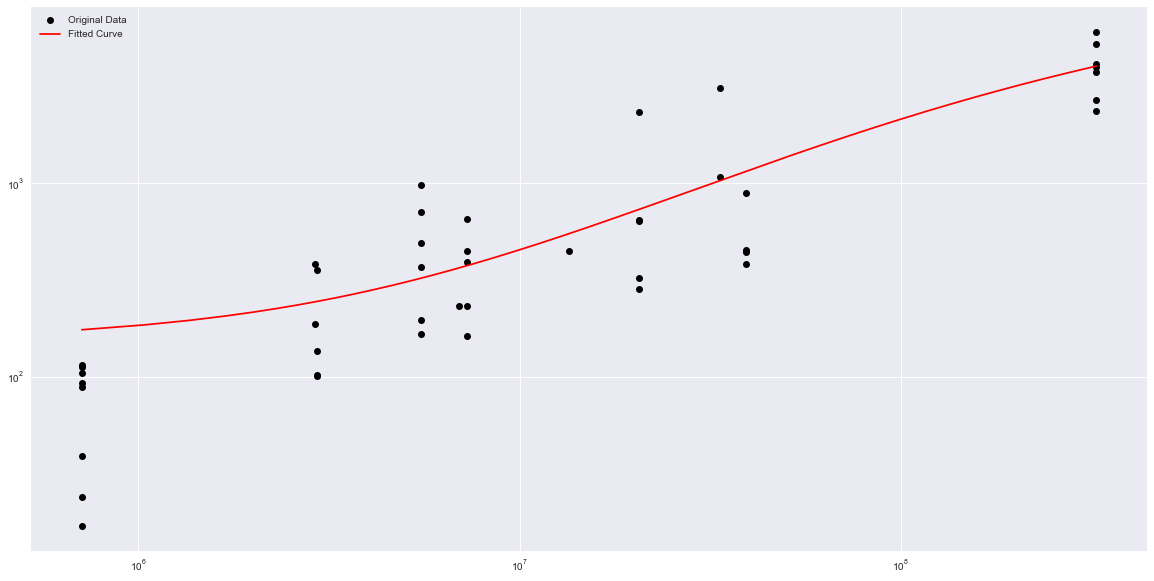

a = 2.23e+03, b = 1.55e-08, c = 1.07


In [174]:
from scipy.optimize import curve_fit

def func(x, a, b, c):  # return a*x**2 + b*x + c
  return a * np.log(b * x + c)
  #return a * np.log(-b * x) + c

xn = np.linspace(min(x),max(x),1000)

popt, pcov = curve_fit(func, x, y)

plt.figure(figsize=(20,10))
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(xn, func(xn, *popt), 'r-', label="Fitted Curve")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

#print("a = %s , b = %s, c = %s" % ( (popt[0], popt[1], popt[2]) ))
print("a = {0:1.3g}, b = {1:1.3g}, c = {2:1.3g}".format(popt[0], popt[1], popt[2]) ) 


In [125]:
x

[711000,
 711000,
 711000,
 711000,
 711000,
 711000,
 711000,
 711000,
 2907289,
 2907289,
 2940058,
 2940058,
 2940058,
 2940058,
 5519952,
 5519952,
 5519952,
 5519952,
 5519952,
 5519952,
 6931071,
 7288000,
 7288000,
 7288000,
 7288000,
 7288000,
 13509000,
 20612439,
 20612439,
 20612439,
 20612439,
 20612439,
 33480797,
 33480797,
 39250017,
 39250017,
 39250017,
 39250017,
 325700000,
 325700000,
 325700000,
 325700000,
 325700000,
 325700000,
 325700000]

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go

In [86]:
data2 = np.column_stack( (ndf['NewPop'], data['count/day'] ))
data2.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [88]:
py.iplot(ndf, filename='basic-scatter')

PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure